In [1]:
# a) Conduct Exploratory Data Analysis (EDA)
import pandas as pd
df = pd.read_csv('/content/winequality-red.csv')
print(df.head())
print(df.isnull().sum())
print(df.describe())
print(df['quality'].value_counts())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

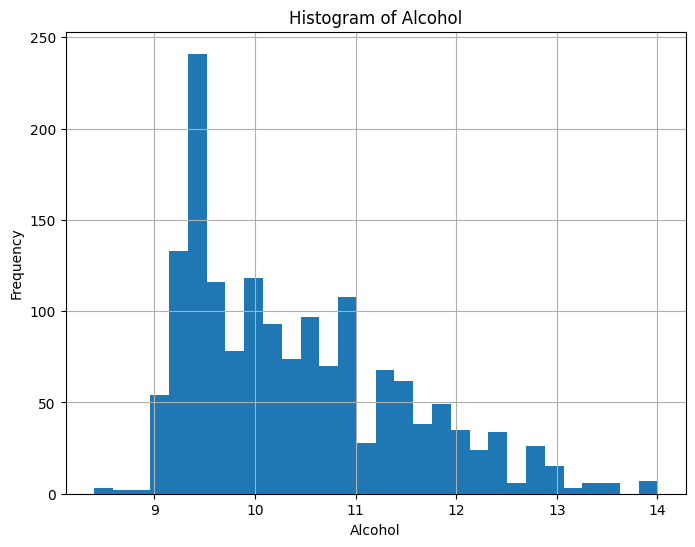

In [2]:
#b) Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# (i) Histogram for a feature like 'alcohol'
plt.figure(figsize=(8, 6))
df['alcohol'].hist(bins=30)
plt.title("Histogram of Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()

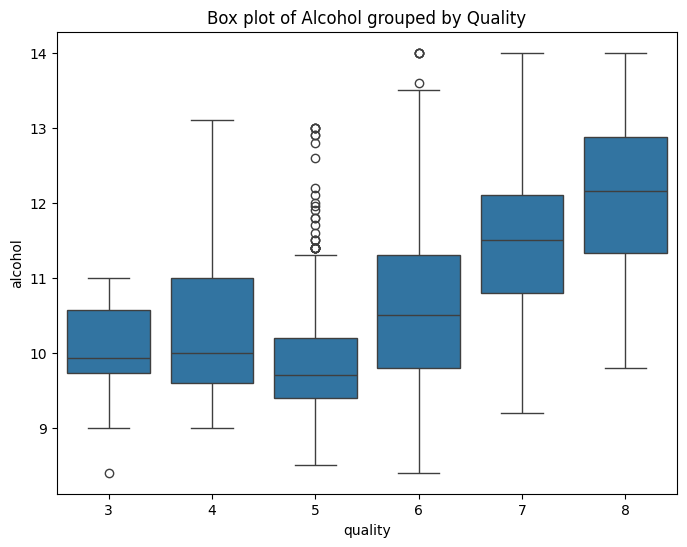

In [3]:
# (ii) Box plot for 'alcohol' grouped by 'quality'
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Box plot of Alcohol grouped by Quality")
plt.show()

In [4]:
#c) Implement Naïve Bayes Classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
X = df.drop(columns=['quality', 'quality_label'])
y = df['quality_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_rep)


Accuracy: 83.12%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       277
           1       0.41      0.56      0.47        43

    accuracy                           0.83       320
   macro avg       0.67      0.72      0.69       320
weighted avg       0.86      0.83      0.84       320

